In [1]:
from preflibtools.instances.preflibinstance import PreflibInstance
import preflibtools
import numpy as np
import os
import collections
import pandas as pd
from scipy import linalg
from collections import OrderedDict
import random
import matplotlib.pyplot as plt

In [2]:
def intro_data(x):
    print("The number of alternatives: ", x.num_alternatives) 
    print("The number of voters: ", x.num_voters)
    print("The sum of vote count(considering the weight of each vote): ", x.sum_vote_count)    
    print("The number of different orders that have been submitted: ", x.num_unique_order)
    print("The order and name of alternatives: ")
    for alt, alt_name in instance.alternatives_name.items():
        alternative = alt
        name = alt_name
        print(alternative, name)

In [3]:
filedir = "./soc/"
files = []
for filename in os.listdir(filedir):
    instance = PreflibInstance()
    instance.parse(filedir + filename)
    files.append(instance)
len(files)

315

# num_alternatives, num_repeat

In [4]:
# list_alternatives = []
# for i in files:
#     list_alternatives.append(i.num_alternatives)
# list_alternatives = np.array(list_alternatives)
# len(list_alternatives)

In [5]:
# num_alternatives, num_repeat = np.unique(list_alternatives, return_counts=True)

# print(num_alternatives)
# print('----------------')
# print(num_repeat)

In [6]:
def sort_order(x):
    data_random = {}
    sort_order = []
    data_np = []

    for orders in x.orders:
        key = ''
        multiplicity = x.order_multiplicity[orders]

        #transfrom order from tuple to str
        for order in orders:
            key = key + str(np.array(order)[0])

        data_random[key] = multiplicity
        sort_order.append(key)  

    sort_order.sort()     

    for order in sort_order:
        data_np.append(data_random[order])

    data_np = np.array(data_np)
    data_np = data_np / np.sum(data_np)
    return data_np

In [7]:
def resize_dat(x, img_size, img_width, img_height, input_size):
    cell_size = int(img_size//input_size)
    
    enlarged_dat = []
    for j in range(x.shape[0]):
        dat = x[j]
        tmp = []
        for i in range(dat.shape[0]):
            for _ in range(cell_size):
                tmp.append(dat[i])
        tmp = np.array(tmp).reshape([img_height, img_width])
        enlarged_dat.append(tmp)
    enlarged_dat = np.array(enlarged_dat)    
    return enlarged_dat

# get samples with num_alternatives is 3

In [8]:
files_select = []
for i in files:
    if (i.num_alternatives == 3):
        files_select.append(i)
len(files_select)

100

# put order and its num of each sample into a np.array

In [9]:
election_data_alt3 = []

for i in files_select:
    order_np = sort_order(i)
#     print(order_np)
    election_data_alt3.append(order_np) 
election_data_alt3 = np.array(election_data_alt3)
print(election_data_alt3.shape)

(100, 6)


In [10]:
img_size = np.math.factorial(6)
img_width = 30
img_height = 24
input_size = np.math.factorial(3)

election_data_alt3_resize = resize_dat(election_data_alt3, img_size, img_width, img_height, input_size)
print(election_data_alt3_resize.shape)

(100, 24, 30)


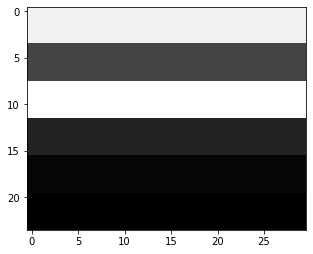

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.cla()
ax.imshow(np.reshape(election_data_alt3_resize[0], (img_height, img_width)), cmap='gray')

In [12]:
election_data_alt3_resize = election_data_alt3_resize.reshape([-1, img_height * img_width])
print(election_data_alt3_resize.shape)

(100, 720)


In [13]:
election_data_alt3_resize = pd.DataFrame(election_data_alt3_resize)
election_data_alt3_resize.to_csv('election_data_alt3_resize.csv')

# -------------------------------------------------------------------------

# get samples with num_alternatives is 4

In [14]:
files_select = []
for i in files:
    if (i.num_alternatives == 4):
        files_select.append(i)
len(files_select)

108

In [15]:
election_data_alt4 = []

for i in files_select:
    order_np = sort_order(i, )
    election_data_alt4.append(order_np) 
election_data_alt4 = np.array(election_data_alt4)
print(election_data_alt4.shape)

(108, 24)


In [16]:
img_size = np.math.factorial(6)
img_width = 30
img_height = 24
input_size = np.math.factorial(4)

election_data_alt4_resize = resize_dat(election_data_alt4, img_size, img_width, img_height, input_size)
print(election_data_alt4_resize.shape)

(108, 24, 30)


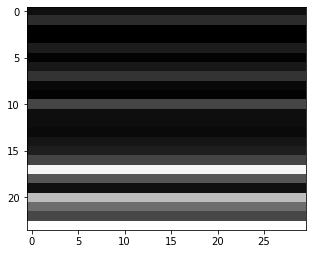

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.cla()
ax.imshow(np.reshape(election_data_alt4_resize[0], (img_height, img_width)), cmap='gray')

In [18]:
election_data_alt4_resize = election_data_alt4_resize.reshape([-1, img_height * img_width])
print(election_data_alt4_resize.shape)

(108, 720)


In [19]:
election_data_alt4_resize = pd.DataFrame(election_data_alt4_resize)
election_data_alt4_resize.to_csv('election_data_alt4_resize.csv')

# ------------------------------------------------------------------

In [20]:
num_data = 100
img_size = 120

fake_alt5 = []
for _ in range(num_data*img_size):
    fake_alt5.append(random.random())
fake_alt5 = np.array(fake_alt5).reshape([num_data, img_size])
print(fake_alt5.shape)

(100, 120)


In [21]:
img_size = np.math.factorial(6)
img_width = 30
img_height = 24
input_size = np.math.factorial(5)

fake_alt5_resize = resize_dat(fake_alt5, img_size, img_width, img_height, input_size)
print(fake_alt5_resize.shape)

(100, 24, 30)


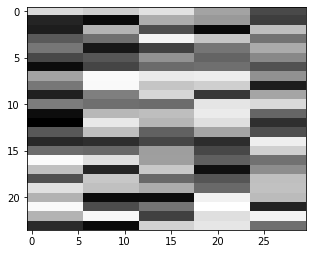

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.cla()
ax.imshow(np.reshape(fake_alt5_resize[0], (img_height, img_width)), cmap='gray')